In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import random
import timeit

In [41]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)
x_train = x_train/255
y_train = np.squeeze(np.eye(10)[y_train]).reshape(-1,10)


In [35]:
def batch_index_generator(N_Samples, Batch_Size):
    NumBatches = N_Samples//Batch_Size
    NumbersArray = np.arange(0, NumBatches*Batch_Size)
    MixedNumbers = np.random.permutation(NumbersArray)
    return np.reshape(MixedNumbers, (Batch_Size, NumBatches))

In [36]:
input_num = 784
middle_num0 = 512
middle_num1 = 256
middle_num2 = 128
target_num = 64
l_rate = 0.001
nEpochs = 50
batch_size = 128
dropout_rate = 0
tensorflow_dropout = True
verbose = False 

tf.reset_default_graph()
Input_tf = tf.placeholder(dtype=tf.float32, shape=(None, input_num), name="inputs")
target_tf = tf.placeholder(dtype=tf.float32, shape=(None, input_num), name="targets")

w0 = tf.get_variable(name="w0_enc", shape=(input_num, middle_num0), dtype=tf.float32,
                    initializer=tf.initializers.random_normal(mean=0.,stddev=0.01))

w1 = tf.get_variable(name="w1_enc", shape=(middle_num0, middle_num1), dtype=tf.float32,
                    initializer=tf.initializers.random_normal(mean=0.,stddev=0.01))

w2 = tf.get_variable(name="w2_enc", shape=(middle_num1, middle_num2), dtype=tf.float32,
                    initializer=tf.initializers.random_normal(mean=0.,stddev=0.01))

w3 = tf.get_variable(name="w3_enc", shape=(middle_num2, target_num), dtype=tf.float32,
                    initializer=tf.initializers.random_normal(mean=0.,stddev=0.01))

b0 = tf.get_variable(name="b0_enc", shape=(middle_num0,), dtype=tf.float32,
                    initializer=tf.initializers.zeros())

b1 = tf.get_variable(name="b1_enc", shape=(middle_num1,), dtype=tf.float32,
                    initializer=tf.initializers.zeros())

b2 = tf.get_variable(name="b2_enc", shape=(middle_num2,), dtype=tf.float32,
                    initializer=tf.initializers.zeros())

b3 = tf.get_variable(name="b3_enc", shape=(target_num,), dtype=tf.float32,
                    initializer=tf.initializers.zeros())

w1_dec = tf.get_variable(name="w1_dec", shape=(target_num, middle_num2), dtype=tf.float32,
                    initializer=tf.initializers.random_normal(mean=0.,stddev=0.01))

w2_dec = tf.get_variable(name="w2_dec", shape=(middle_num2, middle_num1), dtype=tf.float32,
                    initializer=tf.initializers.random_normal(mean=0.,stddev=0.01))

w3_dec = tf.get_variable(name="w3_dec", shape=(middle_num1, middle_num0), dtype=tf.float32,
                    initializer=tf.initializers.random_normal(mean=0.,stddev=0.01))

w4_dec = tf.get_variable(name="w4_dec", shape=(middle_num0, input_num), dtype=tf.float32,
                    initializer=tf.initializers.random_normal(mean=0.,stddev=0.01))

b1_dec = tf.get_variable(name="b1_dec", shape=(middle_num2,), dtype=tf.float32,
                    initializer=tf.initializers.zeros())

b2_dec = tf.get_variable(name="b2_dec", shape=(middle_num1,), dtype=tf.float32,
                    initializer=tf.initializers.zeros())

b3_dec = tf.get_variable(name="b3_dec", shape=(middle_num0,), dtype=tf.float32,
                    initializer=tf.initializers.zeros())

b4_dec = tf.get_variable(name="b4_dec", shape=(input_num,), dtype=tf.float32,
                    initializer=tf.initializers.zeros())

out0 = tf.nn.leaky_relu(tf.nn.xw_plus_b(Input_tf,w0,b0), name="layer0_output")
out1 = tf.nn.leaky_relu(tf.nn.xw_plus_b(out0,w1,b1), name="layer1_output")
out2 = tf.nn.leaky_relu(tf.nn.xw_plus_b(out1,w2,b2), name="layer2_output")
out3 = tf.nn.leaky_relu(tf.nn.xw_plus_b(out2,w3,b3), name="layer3_output")
out4 = tf.nn.leaky_relu(tf.nn.xw_plus_b(out3,w1_dec,b1_dec), name="layer4_output")
out5 = tf.nn.leaky_relu(tf.nn.xw_plus_b(out4,w2_dec,b2_dec), name="layer5_output")
out6 = tf.nn.leaky_relu(tf.nn.xw_plus_b(out5,w3_dec,b3_dec), name="layer6_output")
out7 = tf.nn.leaky_relu(tf.nn.xw_plus_b(out6,w4_dec,b4_dec), name="layer7_output")

loss_tf = tf.reduce_mean(tf.square(out7-target_tf), name="loss")

loss_minimize = tf.train.AdamOptimizer(learning_rate= l_rate).minimize(loss_tf)

verbose = True

In [46]:
sess = tf.InteractiveSession()

start = timeit.default_timer()

sess.run(tf.global_variables_initializer())

IterNum = 0
for epoch in range(nEpochs):    
    BatchIndeces = batch_index_generator(x_train.shape[0], batch_size)
    loss_np = 0
    print("##############    Epoch "+str(epoch).zfill(2)+"    ##############")
    for i in range(BatchIndeces.shape[1]):
        IterNum += 1
        # =================================== Training for one step ========================================            
        X_batch = x_train[BatchIndeces[:,i],:]
        Y_batch = y_train[BatchIndeces[:,i]]
        loss_np, _ =  sess.run([loss_tf, loss_minimize],
                               feed_dict={Input_tf: X_batch, 
                                          target_tf: X_batch})
        # verbose:
        if verbose and i == BatchIndeces.shape[1]-1:
            print("iteration "+str(IterNum).zfill(3)+": loss="+str(loss_np))
    #print("loss is: ", loss_np)
stop = timeit.default_timer()


predicts = out7.eval({Input_tf: x_test, target_tf: x_test})


/tensorflow-1.15.2/python3.6/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


##############    Epoch 00    ##############
iteration 468: loss=0.051378824
##############    Epoch 01    ##############
iteration 936: loss=0.03553723
##############    Epoch 02    ##############
iteration 1404: loss=0.025885548
##############    Epoch 03    ##############
iteration 1872: loss=0.020207461
##############    Epoch 04    ##############
iteration 2340: loss=0.017486317
##############    Epoch 05    ##############
iteration 2808: loss=0.01501422
##############    Epoch 06    ##############
iteration 3276: loss=0.015196608
##############    Epoch 07    ##############
iteration 3744: loss=0.013994439
##############    Epoch 08    ##############
iteration 4212: loss=0.01217003
##############    Epoch 09    ##############
iteration 4680: loss=0.011499587
##############    Epoch 10    ##############
iteration 5148: loss=0.011198539
##############    Epoch 11    ##############
iteration 5616: loss=0.00981595
##############    Epoch 12    ##############
iteration 6084: loss=0.00

In [47]:
print(predicts.shape)
print(type(predicts))


(10000, 784)
<class 'numpy.ndarray'>


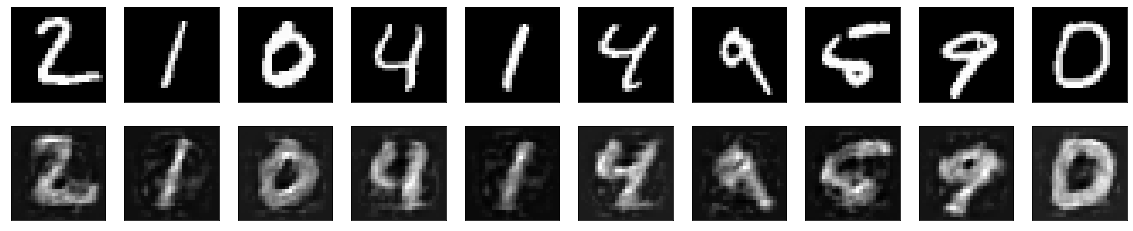

In [48]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(predicts[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()